In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
path = r"/Users/gulgulusingh/Documents/MLOPS/Dataset/height-weight.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


# Scatter Plot

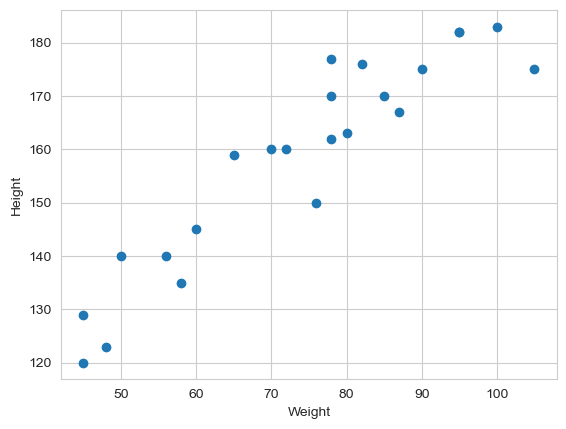

In [4]:
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [6]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


# Independent and Dependent Features

In [10]:
X = df[['Weight']] # independent feature should be in the form of data frame or 2-dimensional array
X.head()
y = df['Height']

# Train_Test_Split

We split the dataset into two parts: one is the Train dataset and the other one is the Test dataset.

This is done to avoid the underfitting or overfitting condition which means:

## Underfitting and Overfitting

**Underfitting:**
- Occurs when a model is too simple.
- Low accuracy on the Training Data as well as low accuracy on the Testing dataset.
- The model is not able to capture the underlying patterns of the data.

**Overfitting:**
- Occurs when a model is too complex.
- High accuracy on the Training data but low accuracy on the Testing dataset.
- The model captures noise and random fluctuations in the training data, which do not generalize well to new data.


In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape

(17, 1)

### Standardization

In [17]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# Linear Regression

In [21]:
regression = LinearRegression(n_jobs=-1)


In [22]:
regression.fit(X_train , Y_train)

LinearRegression(n_jobs=-1)

In [24]:
print("Coefficient: \t" , regression.coef_)
print("Intercept: \t" , regression.intercept_)

Coefficient: 	 [17.2982057]
Intercept: 	 156.47058823529412


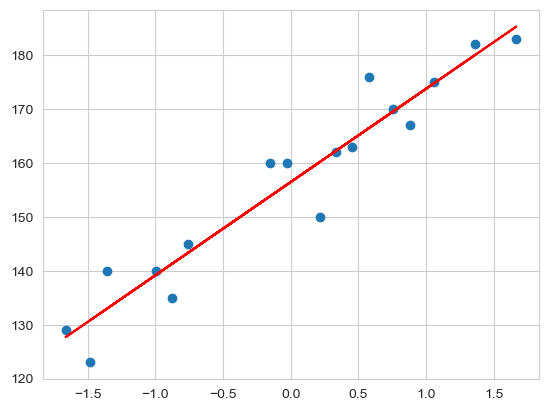

In [27]:
plt.scatter(X_train , Y_train)
plt.plot(X_train , regression.predict(X_train), color='red')

In [28]:
y_predict = regression.predict(X_test)

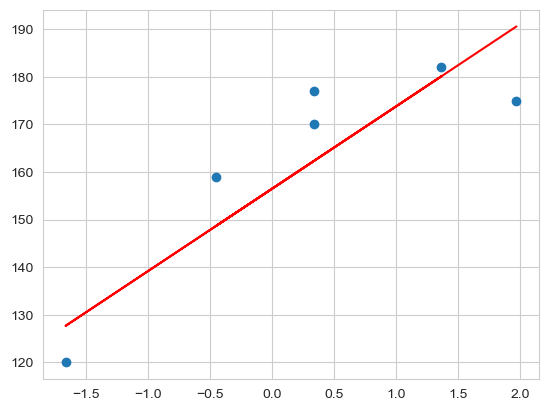

In [31]:
plt.scatter(X_test , Y_test)
plt.plot(X_test , y_predict, color='red')

In [33]:
mse = mean_squared_error(Y_test , y_predict)
mae = mean_absolute_error(Y_test , y_predict)
rmse = np.sqrt(mean_squared_error(Y_test, y_predict))
print("Mean Squared Error : \t" , mse) 
print ("Mean Absolute Error : \t" , mae)
print("Root Mean Squared Error : \t" , rmse)

Mean Squared Error : 	 114.84069295228699
Mean Absolute Error : 	 9.665125886795005
Root Mean Squared Error : 	 10.716374991212605


# Error Metrics

Evaluating the performance of a regression model involves using various error metrics. Each metric has its own characteristics and is suitable for different scenarios. Here are three common error metrics:

## Mean Squared Error (MSE)
- **Definition:** The average of the squares of the differences between the predicted and actual values.
- **Formula:** 
  \[
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  \]
  where \( y_i \) is the actual value and \( \hat{y}_i \) is the predicted value.
- **Characteristics:**
  - Severely penalizes the outliers.
  - Differentiable at all points, which makes it suitable for gradient-based optimization methods.
- **Use Case:** Commonly used in scenarios where large errors are particularly undesirable.

## Root Mean Squared Error (RMSE)
- **Definition:** The square root of the average of the squared differences between the predicted and actual values.
- **Formula:** 
  \[
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
  \]
- **Characteristics:**
  - Not robust to outliers as it is derived from MSE.
  - Not differentiable at all points.
- **Use Case:** Often used to measure the accuracy of a model's predictions in the same units as the original data.

## Mean Absolute Error (MAE)
- **Definition:** The average of the absolute differences between the predicted and actual values.
- **Formula:** 
  \[
  \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
  \]
- **Characteristics:**
  - Robust to outliers.
  - Not differentiable at the global minima, hence it requires subgradient methods for optimization, which can be slower.
- **Use Case:** Preferred in scenarios where robustness to outliers is important.

### Summary of Characteristics

| Metric | Penalizes Outliers | Differentiability | Robustness |
|--------|---------------------|-------------------|------------|
| MSE    | High                | Yes               | Low        |
| RMSE   | High                | No                | Low        |
| MAE    | Low                 | No (at minima)    | High       |

Each metric provides different insights into the performance of a model, and the choice of metric can significantly affect the interpretation and tuning of the model.


# Performance Metrics: \( R^2 \) and Adjusted \( R^2 \)

Evaluating the performance of regression models often involves using metrics that indicate how well the model explains the variability of the response data. Two commonly used metrics are \( R^2 \) (R-squared) and Adjusted \( R^2 \).

## \( R^2 \) (R-squared)
- **Definition:** Also known as the coefficient of determination, \( R^2 \) measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Formula:**
  \[
  R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
  \]
  where \( y_i \) is the actual value, \( \hat{y}_i \) is the predicted value, and \( \bar{y} \) is the mean of the actual values.
- **Interpretation:**
  - \( R^2 \) values range from 0 to 1.
  - An \( R^2 \) of 0 indicates that the model explains none of the variability of the response data around its mean.
  - An \( R^2 \) of 1 indicates that the model explains all the variability of the response data around its mean.
- **Use Case:** Commonly used to measure the goodness of fit of a model.

## Adjusted \( R^2 \)
- **Definition:** Adjusted \( R^2 \) adjusts the \( R^2 \) value based on the number of predictors in the model. It accounts for the model complexity by incorporating the number of predictors and the number of observations.
- **Formula:**
  \[
  \text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \frac{n - 1}{n - p - 1}
  \]
  where \( n \) is the number of observations and \( p \) is the number of predictors.
- **Interpretation:**
  - Adjusted \( R^2 \) can be lower than \( R^2 \) if the added predictors do not improve the model significantly.
  - It can be used to compare models with different numbers of predictors.
- **Use Case:** Preferred over \( R^2 \) when comparing models with a different number of predictors, as it adjusts for the number of predictors in the model.

### Summary of Characteristics

| Metric          | Definition                                           | Use Case                                    |
|-----------------|------------------------------------------------------|---------------------------------------------|
| \( R^2 \)       | Proportion of variance explained by the model        | Measuring the goodness of fit               |
| Adjusted \( R^2 \) | Adjusted for the number of predictors and observations | Comparing models with different numbers of predictors |

Both \( R^2 \) and Adjusted \( R^2 \) are valuable metrics for understanding and comparing the performance of regression models. \( R^2 \) provides a measure of fit, while Adjusted \( R^2 \) accounts for model complexity and is better suited for comparing models.


In [43]:
score = r2_score(Y_test , y_predict)
print("Score : " , score*100 , "% Accuracy")

Score :  73.60826717981276 % Accuracy


In [44]:
Adjusted_r2 = 1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [45]:
print("Adjusted R2 Score : " , Adjusted_r2*100 , "% Accuracy")

Adjusted R2 Score :  67.01033397476594 % Accuracy


Absolutely! Here's the refined version focusing on the theory of OLS linear regression:

# Ordinary Least Squares (OLS) Linear Regression: The Math Behind It

In this notebook, we'll delve into the mathematical underpinnings of Ordinary Least Squares (OLS) linear regression, the go-to method for fitting a line to data.

## What is Linear Regression?

Linear regression is a statistical technique used to model the relationship between a dependent variable ($y$) and one or more independent variables ($x_1$, $x_2$, ... , $x_n$). The goal is to find the best-fitting straight line that explains the linear relationship between these variables.

## The OLS Objective

OLS linear regression aims to minimize the sum of the squared differences between the observed values of the dependent variable ($y$) and the values predicted by the linear model ($\hat{y}$).  This is often called the "residual sum of squares" or RSS.

## The Model

The general form of a linear regression model is:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

where:

* $\hat{y}$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept (the value of $\hat{y}$ when all $x$ values are zero)
* $\beta_1$, $\beta_2$, ..., $\beta_n$ are the coefficients of the independent variables, indicating how much $\hat{y}$ changes for a unit change in each respective $x$
* $x_1$, $x_2$, ..., $x_n$ are the independent variables

## Matrix Notation

OLS can be more concisely represented using matrix notation:

$$Y = X \beta + \epsilon$$

where:

* $Y$ is a vector of observed values of the dependent variable
* $X$ is a matrix of values of the independent variables (often called the design matrix)
* $\beta$ is a vector of coefficients
* $\epsilon$ is a vector of errors (the difference between the observed and predicted values)

## Finding the Optimal Coefficients (β)

The OLS solution for finding the optimal coefficients that minimize the RSS is given by:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$

This solution is derived using calculus (taking the derivative of the RSS with respect to β, setting it to zero, and solving). It relies on the matrix inverse, which is why certain conditions need to be met (e.g., no perfect multicollinearity among independent variables).

## Assumptions of OLS Linear Regression

OLS linear regression makes several key assumptions:

1. **Linearity:** The relationship between the independent and dependent variables is linear.
2. **Independence:** Observations are independent of each other.
3. **Homoscedasticity:** The variance of errors is constant across all levels of the independent variables.
4. **No perfect multicollinearity:** The independent variables are not perfectly correlated with each other.
5. **Normality (Optional):** Errors are normally distributed (this assumption is not strictly required for OLS to work, but it is needed for certain statistical tests and confidence intervals).

## Evaluating Model Fit

Common metrics for evaluating the fit of a linear regression model include:

* **R-squared:** The proportion of variance in the dependent variable explained by the model.
* **Adjusted R-squared:**  A modified version of R-squared that penalizes for adding more variables to the model.
* **Mean Squared Error (MSE):**  The average of the squared differences between the observed and predicted values.

Let me know if you'd like a deeper dive into any of these concepts or want to explore specific mathematical derivations!

Absolutely! Let's break down how to solve for the coefficients β₀ (beta nought, the y-intercept) and β₁ (beta one, the slope) in simple linear regression.

**Simple Linear Regression Model**

In simple linear regression, we have one independent variable (x) and one dependent variable (y). Our model looks like this:

```
ŷ = β₀ + β₁x
```
where:

* ŷ (y-hat) is the predicted value of y
* β₀ is the y-intercept
* β₁ is the slope
* x is the independent variable

**OLS Solution for β₀ and β₁**

The Ordinary Least Squares (OLS) method gives us formulas to directly calculate the optimal values of β₀ and β₁ that minimize the sum of squared errors (RSS):

```
β₁ = (∑(xi - x̄)(yi - ȳ)) / (∑(xi - x̄)²)
β₀ = ȳ - β₁x̄
```

where:

* xi and yi are individual data points
* x̄ is the mean of the x values
* ȳ is the mean of the y values

**Mathematical Derivation**

Let's derive these formulas briefly:

1. **RSS:** The residual sum of squares (RSS) is the sum of the squared differences between observed and predicted values:
   ```
   RSS = ∑(yi - ŷi)² = ∑(yi - β₀ - β₁xi)²
   ```

2. **Minimizing RSS:** To find the values of β₀ and β₁ that minimize RSS, we take partial derivatives of RSS with respect to both β₀ and β₁ and set them to zero. This gives us two equations:

   ```
   ∂RSS/∂β₀ = -2∑(yi - β₀ - β₁xi) = 0  
   ∂RSS/∂β₁ = -2∑xi(yi - β₀ - β₁xi) = 0
   ```

3. **Solving for β₀ and β₁:** Solving these two equations simultaneously leads to the formulas for β₀ and β₁ mentioned above.

**Example Calculation**

Let's consider a small example dataset:

```
x = [1, 2, 3, 4]
y = [2, 4, 5, 4]
```

1. Calculate the means:
   ```
   x̄ = (1 + 2 + 3 + 4) / 4 = 2.5
   ȳ = (2 + 4 + 5 + 4) / 4 = 3.75
   ```

2. Calculate the components of the formulas:

   ```
   ∑(xi - x̄)(yi - ȳ) = (-1.5)(-1.75) + (-0.5)(-0.25) + (0.5)(1.25) + (1.5)(0.25) = 3.5
   ∑(xi - x̄)² = (-1.5)² + (-0.5)² + (0.5)² + (1.5)² = 5
   ```

3. Calculate β₁ and β₀:

   ```
   β₁ = 3.5 / 5 = 0.7
   β₀ = 3.75 - 0.7 * 2.5 = 2
   ```

Therefore, the equation of the best-fit line for this dataset is:
```
ŷ = 2 + 0.7x
```

**Important Note:** In practice, you'll rarely calculate β₀ and β₁ manually. Software libraries like scikit-learn in Python provide functions to fit linear regression models easily. 


In [47]:
model = sm.OLS(Y_train , X_train ).fit() #here the first value is of y_train and then of X_train

In [48]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 12 Jun 2024   Prob (F-statistic):                       0.664
Time:                        17:44:27   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


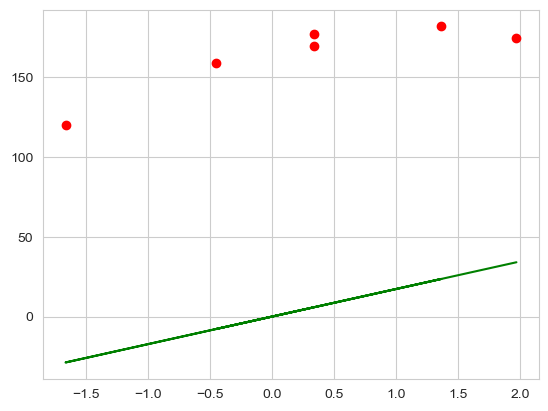

In [51]:
plt.scatter(X_test , Y_test, color='red')
plt.plot(X_test , prediction, color='green')

# Prediction


In [53]:
regression.predict(Scaler.transform([[72]]))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [54]:
model.predict(Scaler.transform([[72]]))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-0.49314119])